In [1]:
import numpy as np
import pandas as pd

from load_data import load_data
from utils.metrics import compute_metrics

from classifiers import EEGNet_classification, EEGNet_SSVEP_classification, EEGNet_TSGL_classification, EEGNet_DeepConvNet_classification, EEGNet_ShallowConvNet_classification
import utils.variables as v


In [2]:
data_type = 'new_ica'
label_type = 'stai'

train_data, test_data, val_data, train_labels, test_labels, val_labels = load_data(data_type, label_type, epoched = True, binary = True)

ERROR:root:1) Failed to read data for recording P006_S002_001
ERROR:root:1) Failed to read data for recording P006_S002_002
ERROR:root:1) Failed to read data for recording P010_S001_001
ERROR:root:1) Failed to read data for recording P013_S001_001
ERROR:root:1) Failed to read data for recording P013_S001_002
ERROR:root:1) Failed to read data for recording P020_S001_001
ERROR:root:1) Failed to read data for recording P023_S002_002


Filtering out invalid recordings



ERROR:root:1) Failed to read data for recording P028_S001_001
ERROR:root:1) Failed to read data for recording P028_S001_002


Returning valid recordings

Valid recs: 
 ['P001_S001_001', 'P001_S001_002', 'P001_S002_001', 'P001_S002_002', 'P002_S001_001', 'P002_S001_002', 'P002_S002_001', 'P002_S002_002', 'P003_S001_001', 'P003_S001_002', 'P003_S002_001', 'P003_S002_002', 'P004_S001_001', 'P004_S001_002', 'P004_S002_001', 'P004_S002_002', 'P005_S001_001', 'P005_S001_002', 'P005_S002_001', 'P005_S002_002', 'P006_S001_001', 'P006_S001_002', 'P007_S001_001', 'P007_S001_002', 'P007_S002_001', 'P007_S002_002', 'P008_S001_001', 'P008_S001_002', 'P008_S002_001', 'P008_S002_002', 'P009_S001_001', 'P009_S001_002', 'P009_S002_001', 'P009_S002_002', 'P010_S001_002', 'P010_S002_001', 'P010_S002_002', 'P011_S001_001', 'P011_S001_002', 'P011_S002_001', 'P011_S002_002', 'P012_S001_001', 'P012_S001_002', 'P012_S002_001', 'P012_S002_002', 'P013_S002_001', 'P013_S002_002', 'P014_S001_001', 'P014_S001_002', 'P014_S002_001', 'P014_S002_002', 'P015_S001_001', 'P015_S001_002', 'P015_S002_001', 'P015_S002_002', 'P016_S001_001', 'P016

In [3]:
probs_EEGNet = EEGNet_classification(train_data, test_data, val_data, train_labels, test_labels, val_labels, data_type = 'new_ica', epoched = True)

Epoch 1/300

Epoch 1: val_loss improved from inf to 0.67345, saving model to /tmp\checkpoint.h5
207/207 - 7s - loss: 0.6851 - accuracy: 0.5674 - val_loss: 0.6734 - val_accuracy: 0.6875 - 7s/epoch - 33ms/step
Epoch 2/300

Epoch 2: val_loss improved from 0.67345 to 0.66480, saving model to /tmp\checkpoint.h5
207/207 - 5s - loss: 0.6849 - accuracy: 0.5681 - val_loss: 0.6648 - val_accuracy: 0.6875 - 5s/epoch - 26ms/step
Epoch 3/300

Epoch 3: val_loss did not improve from 0.66480
207/207 - 5s - loss: 0.6845 - accuracy: 0.5682 - val_loss: 0.6894 - val_accuracy: 0.6875 - 5s/epoch - 26ms/step
Epoch 4/300

Epoch 4: val_loss improved from 0.66480 to 0.64947, saving model to /tmp\checkpoint.h5
207/207 - 5s - loss: 0.6844 - accuracy: 0.5682 - val_loss: 0.6495 - val_accuracy: 0.6875 - 5s/epoch - 26ms/step
Epoch 5/300

Epoch 5: val_loss improved from 0.64947 to 0.63064, saving model to /tmp\checkpoint.h5
207/207 - 5s - loss: 0.6842 - accuracy: 0.5682 - val_loss: 0.6306 - val_accuracy: 0.6875 - 5s/ep

In [4]:
preds_EEGNet = probs_EEGNet.argmax(axis = -1)  
print(preds_EEGNet)
print(test_labels[:,0].T)

performance_EEGNet = compute_metrics(test_labels, preds_EEGNet)
print(performance_EEGNet)

[0 0 0 ... 0 0 0]
[1. 1. 1. ... 0. 0. 0.]

 Confusion matrix:
[[3300    0]
 [2400    0]]
Null error in specificity
[57.89 57.89  0.  ]


In [5]:
print(probs_EEGNet)


[[0.5867822  0.3884373 ]
 [0.58693403 0.38833806]
 [0.5868745  0.38833988]
 ...
 [0.5868858  0.38832617]
 [0.58690196 0.38826445]
 [0.58695865 0.3882019 ]]


Epoch 1/300

Epoch 1: val_loss improved from inf to 0.70372, saving model to /tmp\checkpoint.h5
413/413 - 43s - loss: 0.7966 - accuracy: 0.5592 - val_loss: 0.7037 - val_accuracy: 0.6875 - 43s/epoch - 104ms/step
Epoch 2/300

Epoch 2: val_loss did not improve from 0.70372
413/413 - 38s - loss: 0.7220 - accuracy: 0.5624 - val_loss: 0.7449 - val_accuracy: 0.3125 - 38s/epoch - 92ms/step
Epoch 3/300

Epoch 3: val_loss improved from 0.70372 to 0.65350, saving model to /tmp\checkpoint.h5
413/413 - 36s - loss: 0.7195 - accuracy: 0.5611 - val_loss: 0.6535 - val_accuracy: 0.6875 - 36s/epoch - 88ms/step
Epoch 4/300

Epoch 4: val_loss did not improve from 0.65350
413/413 - 35s - loss: 0.7200 - accuracy: 0.5627 - val_loss: 0.6917 - val_accuracy: 0.6862 - 35s/epoch - 84ms/step
Epoch 5/300

Epoch 5: val_loss did not improve from 0.65350
413/413 - 38s - loss: 0.7125 - accuracy: 0.5659 - val_loss: 0.6569 - val_accuracy: 0.6875 - 38s/epoch - 92ms/step
Epoch 6/300

Epoch 6: val_loss did not improve from 0

c:\Users\annej\anaconda3\envs\MNE\lib\site-packages\pyriemann\utils\viz.py:24: RuntimeWarning: invalid value encountered in true_divide
  cm = 100 * cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]


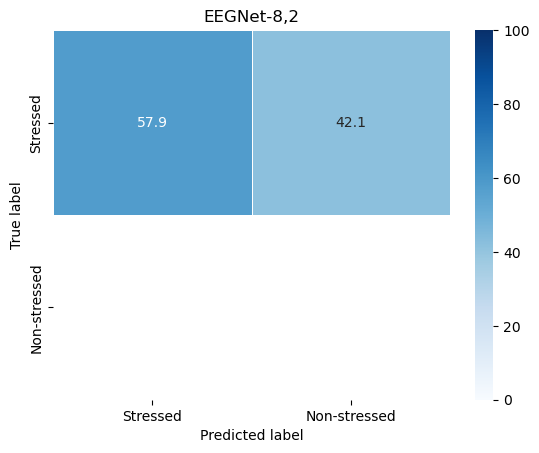

In [6]:
probs_TSGL = EEGNet_TSGL_classification(train_data, test_data, val_data, train_labels, test_labels, val_labels, data_type = 'new_ica', epoched = True)

In [7]:
print(probs_TSGL)
preds_TSGL = probs_TSGL.argmax(axis = -1)  
print(preds_TSGL)
print(test_labels[:,0].T)

performance_TSGL = compute_metrics(test_labels, preds_TSGL)
print(performance_TSGL)

[[0.59316754 0.40683243]
 [0.5925944  0.4074056 ]
 [0.59207034 0.4079297 ]
 ...
 [0.59237415 0.40762585]
 [0.59371305 0.40628695]
 [0.5928277  0.40717235]]
[0 0 0 ... 0 0 0]
[1. 1. 1. ... 0. 0. 0.]

 Confusion matrix:
[[3300    0]
 [2400    0]]
Null error in specificity
[57.89 57.89  0.  ]


In [8]:
probs_Deep = EEGNet_DeepConvNet_classification(train_data, test_data, val_data, train_labels, test_labels, val_labels, data_type = 'new_ica', epoched = True)

TypeError: DeepConvNet() got an unexpected keyword argument 'kernLength'

In [ ]:
print(probs_Deep)
preds_Deep = probs_Deep.argmax(axis = -1)  
print(preds_Deep)
print(test_labels.T)

performance_Deep = compute_metrics(test_labels, preds_Deep)
print(performance_Deep)

In [ ]:
probs_Shallow = EEGNet_ShallowConvNet_classification(train_data, test_data, val_data, train_labels, test_labels, val_labels, data_type = 'new_ica', epoched = True)

In [ ]:
print(probs_Shallow)
preds_Shallow = probs_Shallow.argmax(axis = -1)  
print(preds_Shallow)
print(test_labels.T)

performance_Shallow = compute_metrics(test_labels, preds_Shallow)
print(performance_Shallow)

In [ ]:
probs_TSGLEEGNet = EEGNet_TSGLEEGNet_classification(train_data, test_data, val_data, train_labels, test_labels, val_labels, data_type = 'new_ica', epoched = True)

In [ ]:
print(probs_TSGLEEGNet)
preds_TSGLEEGNet = probs_Shallow.argmax(axis = -1)  
print(preds_TSGLEEGNet)
print(test_labels.T)

performance_TSGLEEGNet = compute_metrics(test_labels, preds_TSGLEEGNet)
print(performance_TSGLEEGNet)